# Sampling Frequency Analysis

## Setup Description
Given the following setup we can consider the minimum sample frequency needed to detect the a lag between the two receivers P0, P1
<div>
<img src="sampling_frequency_analysis_setup.png"/>
</div>

We get the time difference of arrival (TDOA) from
$$
\tau_{01} = \frac{1}{c}\left|\left|P_{S} - P_{0}\right|\right| - \left|\left|P_{S} - P_{1}\right|\right|
$$
Using $P_0 =  (0,0)$ and $P_1 = (r_1, 0)$ we can express $\tau_{01}$ with
$$
\tau_{01} = \frac{1}{c}\left[\sqrt{x_S^2 + y_S^2} - \sqrt{\left(x_S - r_1\right)^2 + y_S^2}\right]
$$
And given that the drone has $(LxWxH) \approx (0.6m\times 0.3m\times0.4m)$ we can try to plot the necessary sampling frequency given the position of the source.

## Minimum Sampling Frequency
With the introduced formula for the TDOA we can calculate what the minimum sampling frequency has to be to give a non-zero lag from the cross-correlation.
This is solely dependant on the resolution available for the cross-correlation where one lag corresponds to the reciprocal of the sampling frequency.
$$
\tau_{01} \geq \tau_{lag,min} = \frac{1}{f_{\text{s}}}
$$

In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def time_difference(
    x0,
    y0,
    x1,
    y1,
    x,
    y,
    c: float = 1500,
):
    return 1/c*(np.sqrt((x-x0)**2+(y-y0)**2)-np.sqrt((x-x1)**2+(y-y1)**2))

<IPython.core.display.Javascript object>


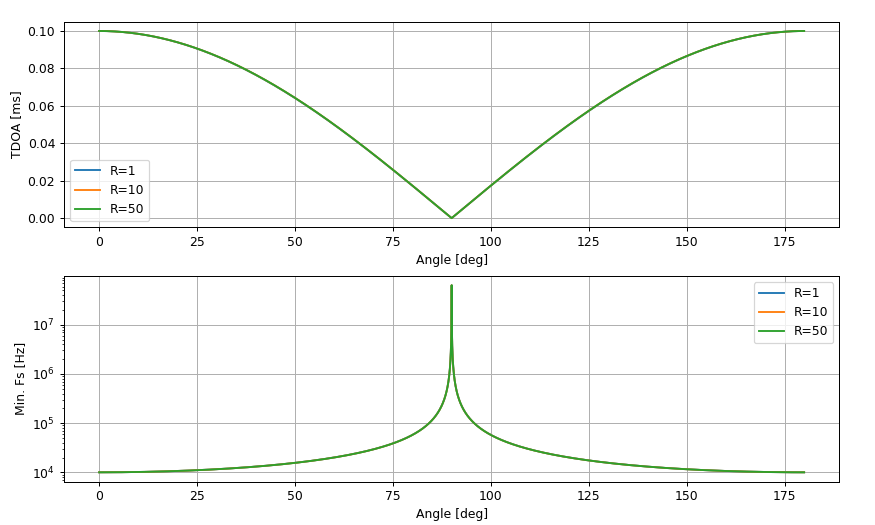

In [7]:
d = 0.075

x0 = -d
y0 = 0
x1 = d
y1 = 0

rs = [1, 10, 50]

fig, axs = plt.subplots(2,1)
fig.tight_layout()

for index, r in enumerate(rs):
    angles = np.linspace(0,np.pi,10000)
    x = r*np.cos(angles)
    y = r*np.sin(angles)

    tau = time_difference(x0,y0,x1,y1,x,y)  
    sample_frequencies = 1/abs(tau)
    degrees = 360*angles/(2*np.pi)
    
    axs[0].plot(degrees, np.abs(tau)*10**3, label=f"R={r}")
    axs[0].set_xlabel("Angle [deg]")
    axs[0].set_ylabel("TDOA [ms]")
    axs[1].plot(degrees, sample_frequencies, label=f"R={r}")
    axs[1].set_xlabel("Angle [deg]")
    axs[1].set_yscale("log")
    axs[1].set_ylabel("Min. Fs [Hz]")

for ax in axs:
    ax.grid()
    ax.legend()


## Results

Given the figure above we can conclude that even for situations where the receivers are very close, e.g. 15cm, the needed minimum sampling frequency only goes high when the source has close to similar distance to both receivers.

Another thing worth noting is, that for this small distance between the receivers the TDOA appears to be similar close to equal regardless of the distance.